# Assignment 9

**PCA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("wine.csv")


In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Exploratory Data Analysis (EDA):**

ploting histogram

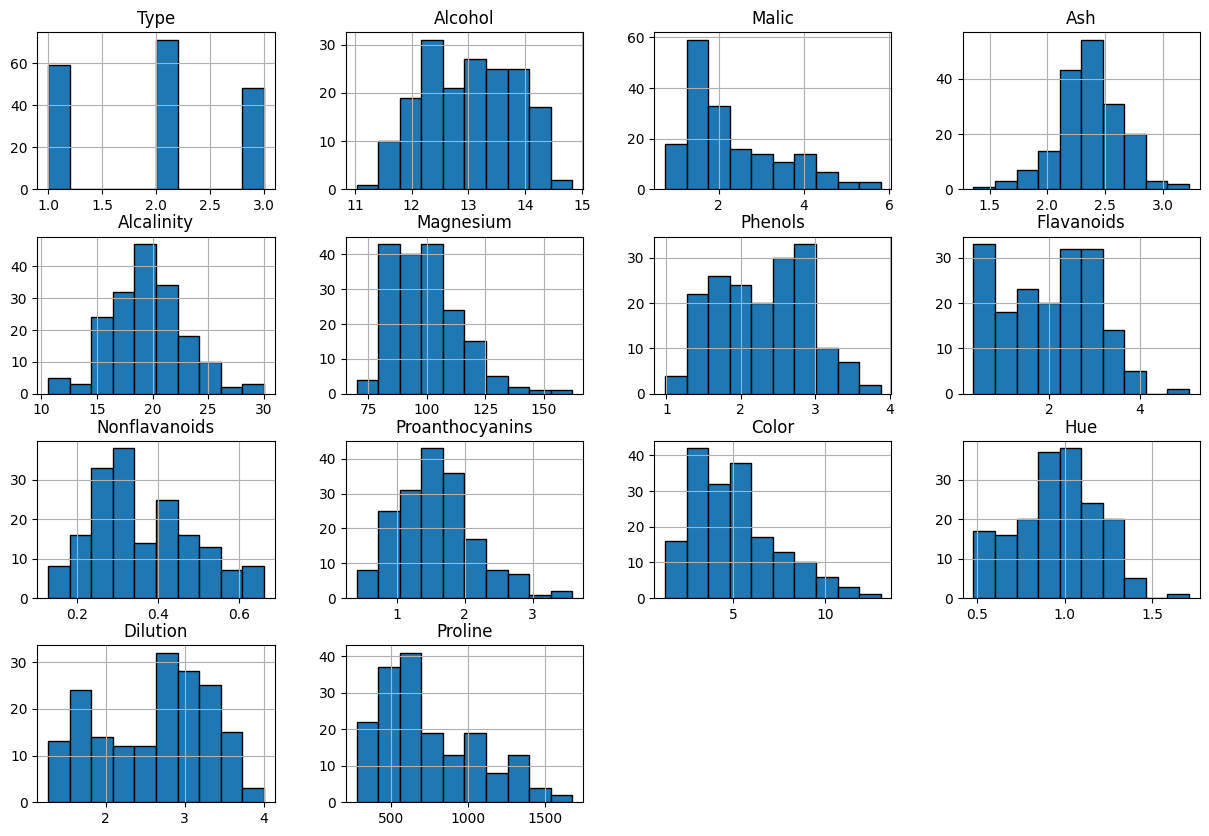

In [5]:
df.hist(figsize=(15, 10),edgecolor='black')
plt.show()

ploting boxplot

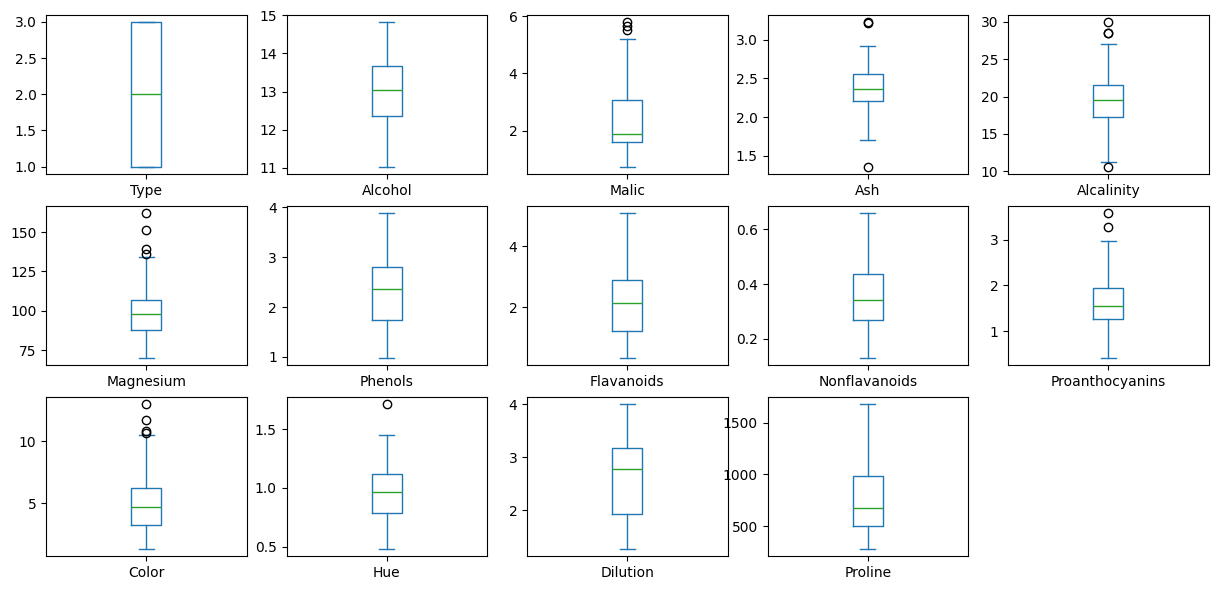

In [6]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 12), sharex=False, sharey=False)
plt.show()

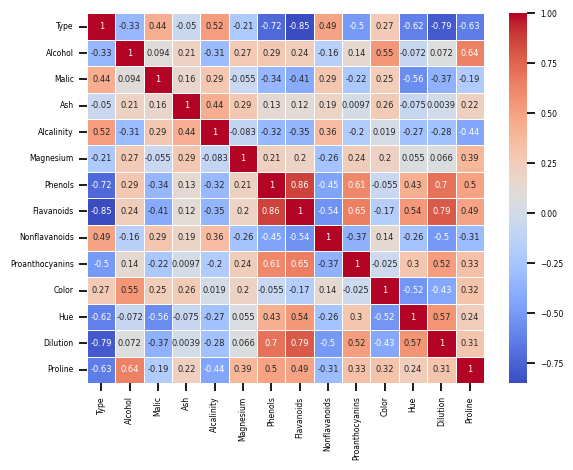

In [10]:
sns.heatmap(df.corr(), linewidths=0.5, annot=True, cmap='coolwarm')
sns.set_context("notebook", font_scale=1, rc={"figure.figsize": (15, 10)})
plt.show()

In [11]:
feat= df.columns
df_std = StandardScaler().fit_transform(df[feat])

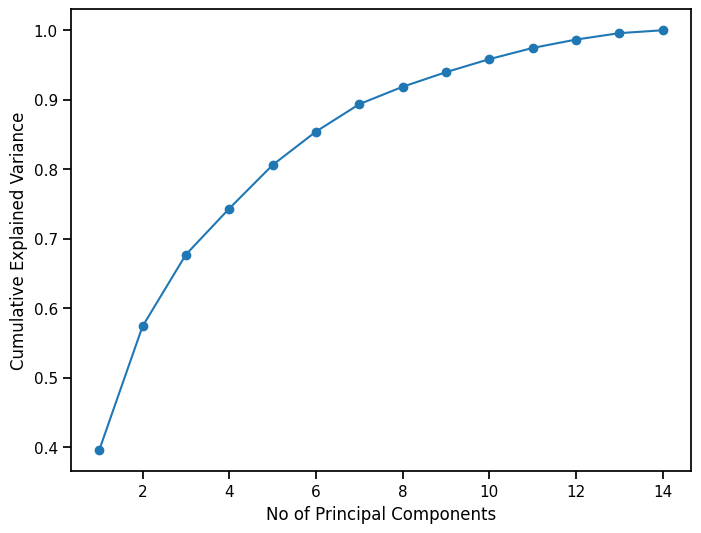

In [12]:
pca = PCA()
p_comp = pca.fit_transform(df_std)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [16]:
df_pca = pd.DataFrame(p_comp)

Clustering with Original Data:

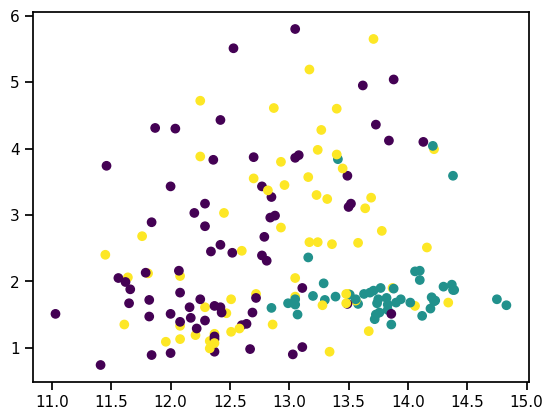

In [27]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_

# Visualization
plt.scatter(df['Alcohol'], df['Malic'], c=labels)
plt.show()

In [28]:
s_avg = silhouette_score(df, labels)
print(f'Silhouette score is : {s_avg}')

Silhouette score is : 0.5711220218931753


Clustering with PCA Data:

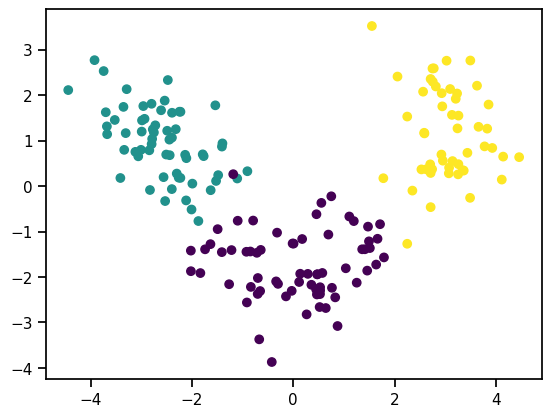

In [30]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_pca)
labels_pca = kmeans_pca.labels_
plt.scatter(df_pca[0], df_pca[1], c=labels_pca)
plt.show()

In [34]:
s_avg_pca = silhouette_score(df_pca, labels_pca)
print(f'Silhouette Score after PCA is : {s_avg_pca}')

Silhouette Score after PCA is : 0.30753783238620536


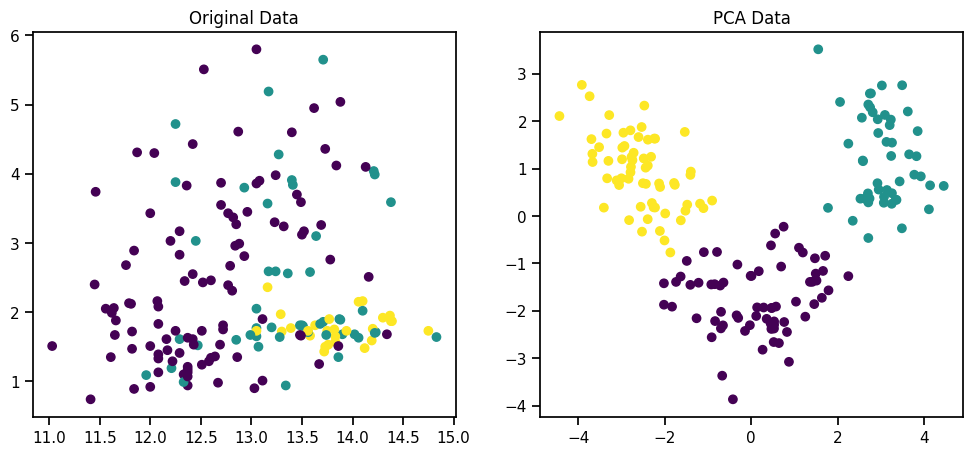

(0.5595717835631026, 0.30648398324833453)

In [36]:
#The original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(df)

#The PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca)

#Calculating silhouette scores
silhouette_original = silhouette_score(df, labels_original)
silhouette_pca = silhouette_score(df_pca, labels_pca)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Alcohol'], df['Malic'], c=labels_original, cmap='viridis')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.scatter(df_pca[0], df_pca[1], c=labels_pca, cmap='viridis')
plt.title('PCA Data')
plt.show()
silhouette_original, silhouette_pca


**Silhouette Score Comparison**

The silhouette score is almost 0.571. PCA Data: The silhouette score is roughly 0.308. The original data's silhouette score is higher than the PCA-transformed data's, suggesting that the original data's clustering produced more distinct clusters.Visualization Comparison: Original and PCA-transformed data clustering findings are displayed in scatter plots. In contrast to the PCA-transformed data, the original data's clusters are more pronounced.Analysis:Impact of PCA on Dimensionality Reduction: PCA can simplify the dataset and lower computing complexity by reducing dimensionality. The lower silhouette score in this instance, however, also suggests that it resulted in a decline in clustering quality.Cluster Separation: Because the original data was kept, the clusters were more clearly separated.

**Key Finding**

A higher silhouette score indicates that the clusters created by clustering on the original dataset were better defined.
Although PCA is helpful in lowering dimensionality, it can occasionally result in the loss of important information for tasks like grouping.
Implications for Practice:When working with extremely high-dimensional data, PCA is helpful, especially when computational speed is an issue. The trade-offs between dimensionality reduction and the possible loss of significant data features must be carefully considered, though.PCA can efficiently capture the variance with fewer dimensions for datasets with highly correlated characteristics, however it does not necessarily enhance clustering results.When to Use PCA: PCA is suggested when the dataset's dimensionality is too high for direct clustering or when you have a lot of features and wish to reduce noise. When to Avoid PCA: It could be preferable to carry out clustering directly without dimensionality reduction if the dataset contains well-separated clusters in its original form or if the relationships between features are important.